# Import libraries 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import AdamW
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import img_to_array
from keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
import cv2
import numpy as np
import os

2024-07-31 20:47:43.850275: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 20:47:44.443593: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 20:47:44.623668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 20:47:44.623774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 20:47:44.626200: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Preprocessing Data

In [2]:
random = np.random.randint(0,430)
img_path_angry = []
img_path_fear = []
img_path_contempt = []
img_path_disgust = []
img_path_happy = []
img_path_neutral = []
img_path_sad = []
img_path_suprise = []

classes = ['angry','contempt','disgust','fear','happy','neutral','sad','suprise']

path = r'train'
for j in os.walk(path):
    if classes[0] in j[0]:
        for i in j[2]:
            img_path_angry.append(fr'{j[0]}/{i}')
    elif classes[1] in j[0]:
        for i in j[2]:
            img_path_contempt.append(fr'{j[0]}/{i}')
    elif classes[2] in j[0]:
        for i in j[2]:
            img_path_disgust.append(fr'{j[0]}/{i}')
    elif classes[3] in j[0]:
        for i in j[2]:
            img_path_fear.append(fr'{j[0]}/{i}')
    elif classes[4] in j[0]:
        for i in j[2]:
            img_path_happy.append(fr'{j[0]}/{i}')
    elif classes[5] in j[0]:
        for i in j[2]:
            img_path_neutral.append(fr'{j[0]}/{i}')
    elif classes[6] in j[0]:
        for i in j[2]:
            img_path_sad.append(fr'{j[0]}/{i}')
    elif classes[7] in j[0]:
        for i in j[2]:
            img_path_suprise.append(fr'{j[0]}/{i}')

In [3]:
def plot_image():
    
    i = np.random.randint(0,100)

    img_angry = cv2.imread(img_path_angry[i])
    img_disgust = cv2.imread(img_path_disgust[i])
    img_happy = cv2.imread(img_path_happy[i])
    img_neutral = cv2.imread(img_path_neutral[i])
    img_sad = cv2.imread(img_path_sad[i])
    img_suprise = cv2.imread(img_path_suprise[i])
    img_fear = cv2.imread(img_path_fear[i])
    img_contempt = cv2.imread(img_path_contempt[i])


    fig , axs = plt.subplots(1,8,figsize=[13,15])

    axs[0].imshow(img_angry)
    axs[0].set_title('Angry')
    
    axs[1].imshow(img_fear)
    axs[1].set_title('Fear')

    axs[2].imshow(img_happy)
    axs[2].set_title('Happy')

    axs[3].imshow(img_neutral)
    axs[3].set_title('Neutral')

    axs[4].imshow(img_sad)
    axs[4].set_title('Sad')

    axs[5].imshow(img_suprise)
    axs[5].set_title('Suprise')

    axs[6].imshow(img_contempt)
    axs[6].set_title('contempt')

    axs[7].imshow(img_disgust)
    axs[7].set_title('disgust')

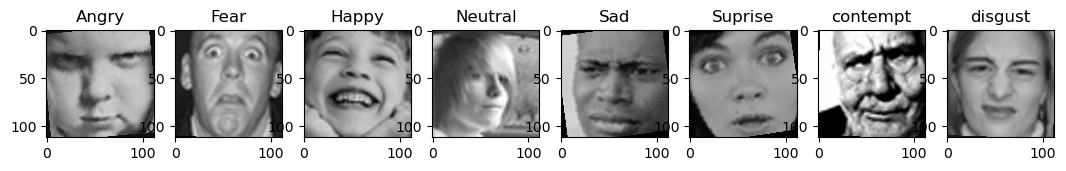

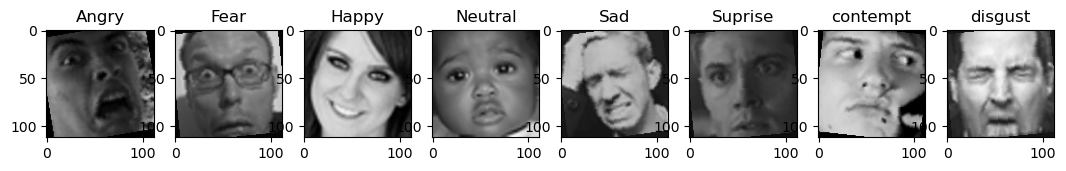

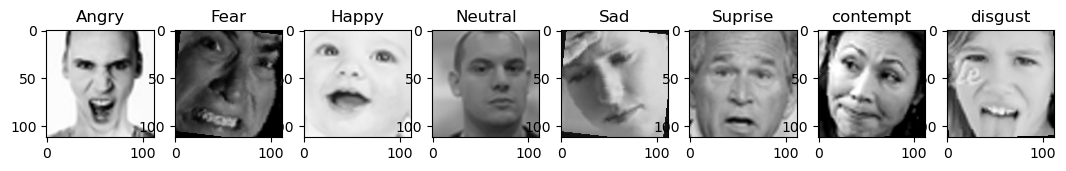

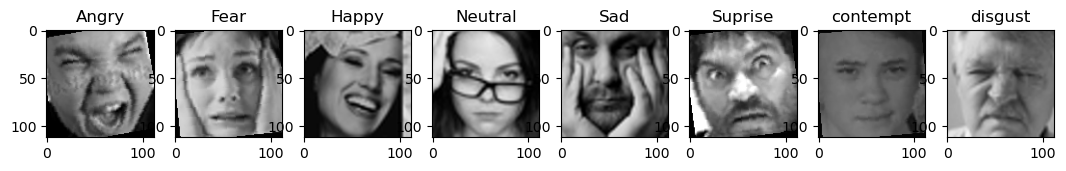

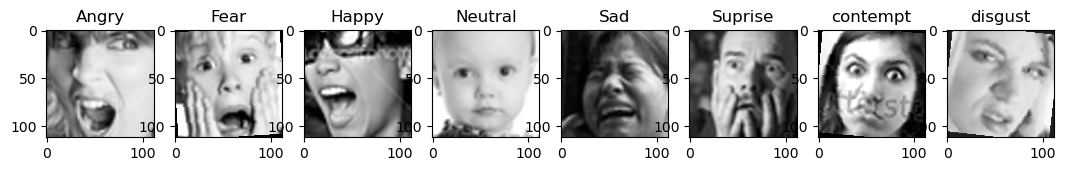

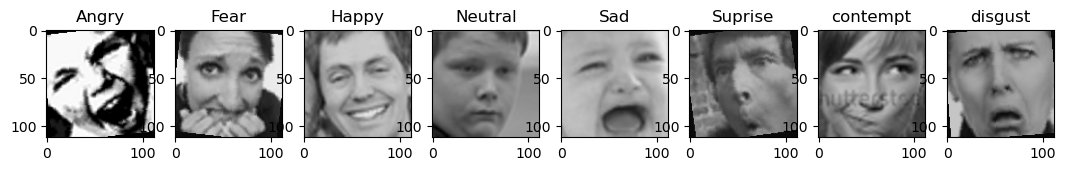

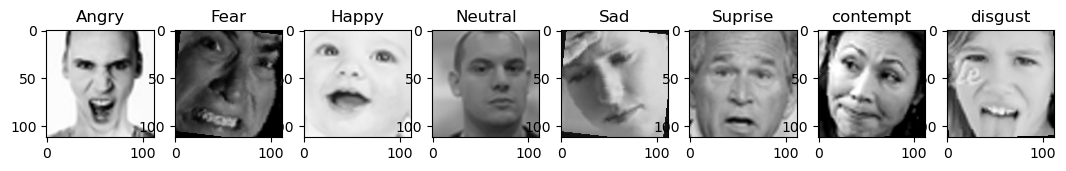

In [4]:
for i in range(0,7):
    plot_image()

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                              zoom_range = 0.2,
                              shear_range = 0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [6]:
path = r'train'
train_dataset = train_data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 66379 images belonging to 8 classes.


In [7]:
path = r'validation'
valid_dataset = test_data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 8341 images belonging to 8 classes.


# Initialise Model

In [8]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(48, 48, 1), padding='same',kernel_regularizer='l2'))
model.add(Conv2D(64, (3, 3), activation='elu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='elu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Conv2D(128, (3, 3), activation='elu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation = 'gelu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'softmax'))

2024-07-31 20:48:41.411643: I tensorflow/core/common_runtime/next_pluggable_device/next_pluggable_device_factory.cc:118] Created 1 TensorFlow NextPluggableDevices. Physical device type: XPU


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

# Initialise optimizer

In [10]:
adamw_optimizer = AdamW(learning_rate=0.0001, weight_decay=1e-4)
model.compile(
    optimizer=adamw_optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [11]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [12]:
hist = model.fit(
    train_dataset,  # Your training dataset
    epochs=200,  # Number of epochs to train
    validation_data=valid_dataset,  # Your validation dataset
    #steps_per_epoch=300,  # Number of steps per epoch
    callbacks=callbacks,  # List of callbacks
    use_multiprocessing=True,
)

Epoch 1/200


2024-07-31 20:48:50.081939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type XPU is enabled.


2075/2075 [==============================] - 371s 173ms/step - loss: 14.6486 - accuracy: 0.2830 - val_loss: 7.7143 - val_accuracy: 0.3479 - lr: 1.0000e-04
Epoch 2/200
2075/2075 [==============================] - 240s 115ms/step - loss: 4.8920 - accuracy: 0.4258 - val_loss: 3.2379 - val_accuracy: 0.5298 - lr: 1.0000e-04
Epoch 3/200
2075/2075 [==============================] - 241s 114ms/step - loss: 2.8868 - accuracy: 0.4969 - val_loss: 2.4542 - val_accuracy: 0.5620 - lr: 1.0000e-04
Epoch 4/200
2075/2075 [==============================] - 242s 115ms/step - loss: 2.3653 - accuracy: 0.5423 - val_loss: 2.1989 - val_accuracy: 0.5884 - lr: 1.0000e-04
Epoch 5/200
2075/2075 [==============================] - 225s 108ms/step - loss: 2.1503 - accuracy: 0.5686 - val_loss: 2.0349 - val_accuracy: 0.6032 - lr: 1.0000e-04
Epoch 6/200
2075/2075 [==============================] - 224s 108ms/step - loss: 2.0316 - accuracy: 0.5848 - val_loss: 2.0160 - val_accuracy: 0.6004 - lr: 1.0000e-04
Epoch 7/200
207

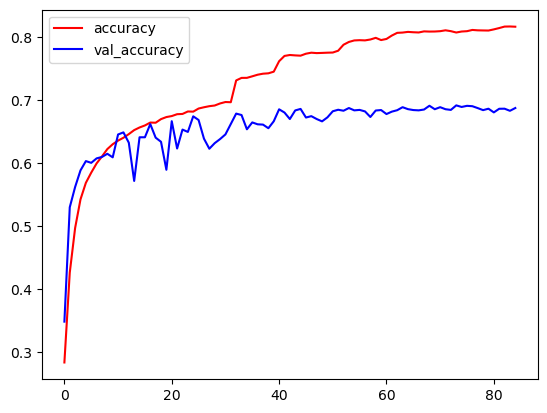

In [13]:
plt.plot(hist.history['accuracy'],color='r')
plt.plot(hist.history['val_accuracy'],color='b')
plt.legend(['accuracy','val_accuracy'])
plt.show()

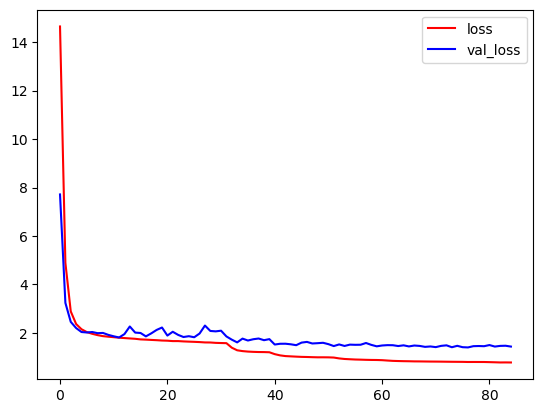

In [14]:
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.legend(['loss','val_loss'])
plt.show()

In [15]:
model.evaluate(valid_dataset)

261/261 [==============================] - 11s 42ms/step - loss: 1.4073 - accuracy: 0.6918


[1.4073097705841064, 0.6917635798454285]

In [16]:
model.save('model.h5')

/opt/intel/oneapi/intelpython/envs/tensorflow-gpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
